In [134]:
#Define Constante
DIR = "/content/drive/MyDrive/Colab Notebooks/UPM/PRDL/EDA/"

#importation
from pandas.plotting import scatter_matrix
from google.colab import drive
import os
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import linear_model
import math

In [101]:
def importData():
  drive.mount("/content/drive")
  
  #Change directory
  os.chdir(DIR)

  # Read Clinical Data
  OSA_Clinical_df = pd.read_csv("OSA_DB_UPM_Clinical.csv",sep=';',na_values=['-1'])
  OSA_Clinical_df=OSA_Clinical_df.dropna()

  # Now Read Demographical Information
  OSA_Demo_df = pd.read_csv("OSA_DB_UPM_Age_Gender.csv",na_values=['-1'])
  OSA_Demo_df=OSA_Demo_df.dropna()

  # JOIN OSA_Demo_df and OSA_Clinical_df
  OSA_df = pd.merge(OSA_Clinical_df, OSA_Demo_df, on='ID', how='inner')

  OSA_df['ID'] = OSA_df['ID'].astype('str')
  OSA_df = OSA_df.set_index('ID')
  return OSA_df

In [124]:
def plotData(df):
    axes = scatter_matrix(df, alpha=0.6, figsize=(12, 8), diagonal='hist')

def getCorr(df):
  corr = df.corr()
  corr.style.background_gradient(cmap='coolwarm')
  return corr

---
---

# Scikit-Learn introduction for fitting linear regression models
* # Review the concepts in PRDL Chapter 3



## [scikit-learn: Machine Learning in Python](http://scikit-learn.org/stable/)
![Scikit-learn Image](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

## Python ML <font color='blue'>sklearn</font> for Multiple Linear Regression

In [133]:
def splitData(dataSet):
  # Splitting into train and test sets

  # Generate the training set.  Set random_state to be able to replicate results.
  train = dataSet.sample(frac=0.8, random_state=1)

  # Select anything not in the training set and put it in the testing set.
  test = dataSet.loc[~dataSet.index.isin(train.index)]

  # Print the shapes of both sets.
  #print(train.shape)
  #print(test.shape)
  
  return train, test

## TRAIN:

In [63]:
def model_training(model, features, output):
  # Fit the model to the training data.
  Trained_model=model.fit(features, output)
  return Trained_model

## Test

In [70]:
def model_testing(model, features, output):
  ### Predicting Error

  # Generate our predictions for the test set.
  predictions = model.predict(features)

  #Create a Column with mean of targets value to compare MSE and MAE
  meanSerie = pd.Series(output.mean(), index = test.index)

  # Compute error between our test predictions and the actual values.
  MSE=mean_squared_error(predictions, output)
  MS=mean_squared_error(output, meanSerie)

  MAE=mean_absolute_error(predictions, output)
  MA=mean_absolute_error(output, meanSerie)

  print('Mean squared Error: ', MSE, ' Mean Absolute Error: ', MAE)
  print('Min Mean squared Error: ', MS, ' Min Mean Absolute Error: ', MA)

  # Explained variance score:
  print('Variance score: %.2f' % r2_score(output, predictions))

  # Plot outputs
  plt.scatter(output, predictions,  color='red')
  plt.show()

In [120]:
df = importData()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


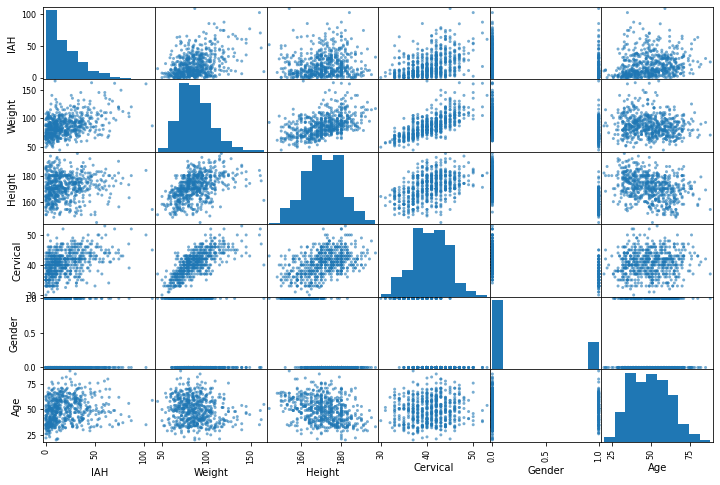

In [122]:
plotData(df)

In [126]:
corr = getCorr(df)
corr.style.background_gradient(cmap='coolwarm')

,IAH,Weight,Height,Cervical,Gender,Age
IAH,1.000000,0.407314,0.104435,0.428931,-0.193713,0.163585
Weight,0.407314,1.000000,0.463731,0.721886,-0.333230,-0.133738
Height,0.104435,0.463731,1.000000,0.459095,-0.676934,-0.326519
Cervical,0.428931,0.721886,0.459095,1.000000,-0.606353,0.089495
Gender,-0.193713,-0.333230,-0.676934,-0.606353,1.000000,0.090490
Age,0.163585,-0.133738,-0.326519,0.089495,0.090490,1.000000


In [131]:
def training_process(model, predictors, target):
  print("Model : ", type(model))
  print('Predictor : ', predictors)
  print("Target : ", target)
  #Split Date into Training and testing dataset, Train and Test the model on those
  train, test = splitData(OSA_df)
  model = model_training(model, train[predictors], train[target])
  model_testing(model, test[predictors], test[target])

## Frist ML Algoritme : 
### Linear regression on Age, Weight, Height and Cervical

Model :  <class 'sklearn.linear_model._base.LinearRegression'>
Predictor :  ['Weight', 'Height', 'Cervical', 'Age']
Target :  IAH
(479, 7)
(120, 7)
Mean squared Error:  323.88180208070895  Mean Absolute Error:  13.303993149090866
Min Mean squared Error:  378.5703222222222  Min Mean Absolute Error:  15.033555555555555
Variance score: 0.14


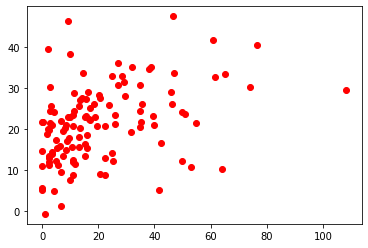

In [132]:
#Define features and output
predictors = [column for column in corr.columns if corr['IAH'][column] > 0 and column != 'IAH']
target = 'IAH'

# Define the model
model = linear_model.LinearRegression()

training_process(model, predictors, target)

## Try improve using "feature" engineering ...  BMI, ....  (log(AHI))

In [127]:
df.head()

,IAH,Weight,Height,Cervical,Gender,Age
ID,,,,,,
2,29.6,119.0,174.0,48.0,0,56.0
4,19.7,78.0,168.0,42.0,0,39.0
5,9.0,80.0,173.0,40.0,0,32.0
6,2.0,109.0,190.0,42.0,0,32.0
7,34.0,86.0,169.0,42.0,0,39.0


In [128]:
df['BMI'] = OSA_df['Weight']/(OSA_df['Weight']**2)*10000

In [129]:
df.head()

,IAH,Weight,Height,Cervical,Gender,Age,BMI
ID,,,,,,,
2,29.6,119.0,174.0,48.0,0,56.0,84.033613
4,19.7,78.0,168.0,42.0,0,39.0,128.205128
5,9.0,80.0,173.0,40.0,0,32.0,125.000000
6,2.0,109.0,190.0,42.0,0,32.0,91.743119
7,34.0,86.0,169.0,42.0,0,39.0,116.279070


In [130]:
corr = getCorr(df)
corr.style.background_gradient(cmap='coolwarm')

,IAH,Weight,Height,Cervical,Gender,Age,BMI
IAH,1.000000,0.407314,0.104435,0.428931,-0.193713,0.163585,-0.370612
Weight,0.407314,1.000000,0.463731,0.721886,-0.333230,-0.133738,-0.954793
Height,0.104435,0.463731,1.000000,0.459095,-0.676934,-0.326519,-0.499365
Cervical,0.428931,0.721886,0.459095,1.000000,-0.606353,0.089495,-0.746424
Gender,-0.193713,-0.333230,-0.676934,-0.606353,1.000000,0.090490,0.402940
Age,0.163585,-0.133738,-0.326519,0.089495,0.090490,1.000000,0.114826
BMI,-0.370612,-0.954793,-0.499365,-0.746424,0.402940,0.114826,1.000000


Model :  <class 'sklearn.linear_model._base.LinearRegression'>
Predictor :  ['Weight', 'Cervical', 'BMI']
Target :  IAH
Mean squared Error:  334.78997095240356  Mean Absolute Error:  13.331461786730715
Min Mean squared Error:  378.5703222222222  Min Mean Absolute Error:  15.033555555555555
Variance score: 0.12


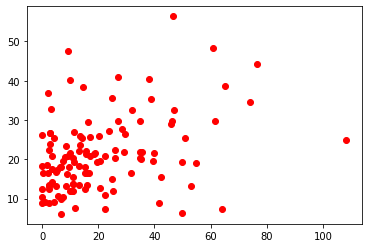

In [136]:
#Define features and output
predictors = [column for column in corr.columns if abs(corr['IAH'][column]) > 0.35 and column != 'IAH']
target = 'IAH'

# Define the model
model = linear_model.LinearRegression()
training_process(model, predictors, target)